# **Análisis del rendimiento goleador de Leonel Messi**

El objetivo del proyecto es analizar cómo se ha desarrollado la capacidad goleadora del futbolista Argentino Lionel Messi en los distintos clubes donde jugó. 
El análisis se basará en su desempeño a través del tiempo, en cada torneo disputado, jugando en casa (o fuera de ella), enfrentando a equipos de cada Comunidad
Autónoma de España y en clásicos. También se comparará a Messi con el resto de los goleadores del top 50 histórico en cuánto a sus estaturas.

***

**HIPÓTESIS DEL PROYECTO**
* Hipótesis 1: el desempeño goleador de Messi es más alto enfrentando a equipos de la Comunidad de Madrid que a cualquier otra Comunidad de España.

* Hipótesis 2 : el desempeño goleador de Messi baja considerablemente en clásicos (vs Real Madrid y vs Espanyol).

* Hipótesis 3 : la gran mayoría de goleadores juegan en la delantera, más precisamente como centrodelanteros. Debido a que deben estar en constante disputa con los defensores, una contextura física grande puede ser de gran ayuda. En este sentido, Messi es, dentro del top 50 histórico de goleadores, el de más baja estatura.

***

**FUENTES DE DATOS**

La fuente de datos principal del proyecto fue extraida de [Kaggle](https://www.kaggle.com/datasets/azminetoushikwasi/-lionel-messi-all-club-goals).En esta se encuentran todos los goles de Lionel Messi a nivel clubes (Bcn y PSG).

Los goles del Inter Miami se obtuvieron de este [enlace](https://www.transfermarkt.es/lionel-messi/leistungsdaten/spieler/28003).

También se obtuvieron datos de [Wikipedia](https://es.wikipedia.org/wiki/Anexo:Estad%C3%ADsticas_de_Lionel_Messi#cite_note-67) y [messi.starplayerstats.com](https://messi.starplayerstats.com/en/goals/200/0/all/0/0/0/t/all/all/0/0/1).


***

**WEBSCRAPPING**

Utilizando esta técnica obtuve una base de datos con los 50 máximos goleadores de la historia del fútbol profesional.

A través de un recorrido por sus perfiles de Wikipedia obtuve la altura de c/u (en los casos en los que está la información).

[Enlace](notebooks/web_scrapping.ipynb)

***

**ANÁLISIS GENERAL DEL DESEMPEÑO GOLEADOR DE MESSI**

En esta primera parte se realiza un análisis más general del recorrido goleador del jugador, antes de entrar en el desarrollo de las hipótesis.

In [3]:
# Importo el dataset y las librerias.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/goles_europa_eeuu.csv')
df.head()

,Season,Competition,Date,Venue,Club,Opponent,Minute,At_score,Type,Goal_assist,Comunidad,Score home,Score visitant
0,04/05,LaLiga,01-05-2005,H,FC Barcelona,Albacete Balompie,90+1,2-00,Left-footed shot,Ronaldinho Gaacho,Castilla La Mancha,2,0
1,05/06,UEFA Champions League,02-11-2005,H,FC Barcelona,Panathinaikos Athens,34,3-00,Left-footed shot,NaN,Atenas,5,0
2,10/11,UEFA Champions League,14-09-2010,H,FC Barcelona,Panathinaikos Athens,22,1-01,Left-footed shot,Xavi,Atenas,5,1
3,10/11,UEFA Champions League,14-09-2010,H,FC Barcelona,Panathinaikos Athens,45,3-01,Left-footed shot,Pedro,Atenas,5,1
4,10/11,UEFA Champions League,24-11-2010,A,FC Barcelona,Panathinaikos Athens,63,0-02,Left-footed shot,Adriano,Atenas,0,3


In [4]:
# Hay 2 temporadas que aparecen como fecha
df['Season'].unique()

array(['04/05', '05/06', '10/11', '08/09', '09/10', '11-Dec', 'Dec-13',
       '13/14', '14/15', '15/16', '16/17', '17/18', '20/21', '18/19',
       '19/20', '07/08', '06/07', '22/23', '21/22'], dtype=object)

In [5]:
# Las reemplazo.
df['Season'] = df['Season'].replace({'11-Dec': '11/12', 'Dec-13': '12/13'})

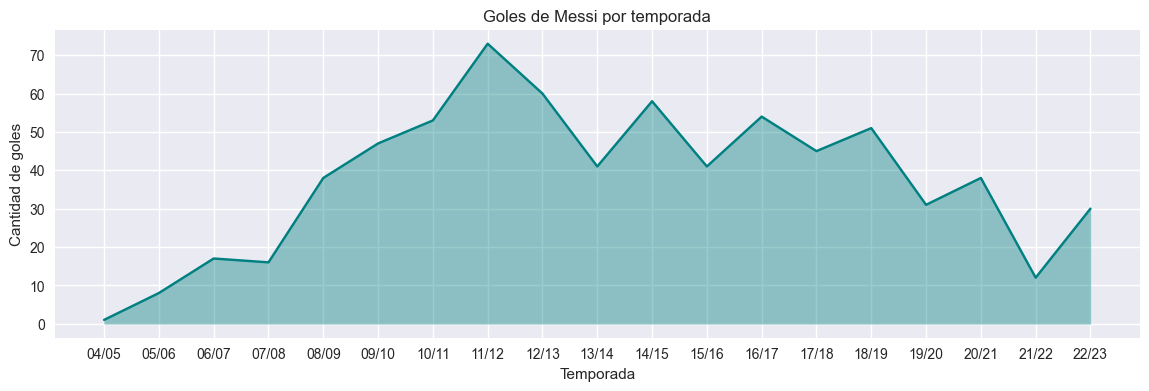

In [6]:
# Gráfico de goles por temporada
# Estilo a utilizar:
plt.style.use('seaborn-v0_8')

goles_by_season = df.groupby(df['Season']).size()
fig = plt.figure(figsize=(14,4))
plt.plot(goles_by_season.index, goles_by_season.values, color='teal')
plt.fill_between(goles_by_season.index, goles_by_season.values, color='teal', alpha=0.4)
plt.title("Goles de Messi por temporada")
plt.xlabel("Temporada")
plt.ylabel("Cantidad de goles")
plt.xticks(goles_by_season.index);

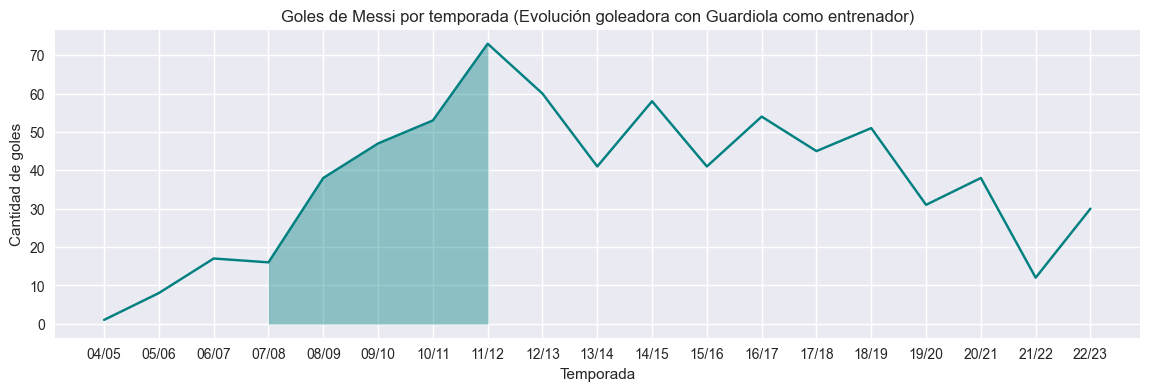

In [7]:
# Ahora destacando el crecimiento bajo las órdenes de Guardiola
fig = plt.figure(figsize=(14,4))
plt.plot(goles_by_season.index, goles_by_season.values, color='teal')
plt.fill_between(goles_by_season.index, goles_by_season.values, where=goles_by_season.index.isin(['07/08', '08/09', '09/10', '10/11', '11/12']), color='teal', alpha=0.4)
plt.title("Goles de Messi por temporada (Evolución goleadora con Guardiola como entrenador)")
plt.xlabel("Temporada")
plt.ylabel("Cantidad de goles")
plt.xticks(goles_by_season.index);

***

**Se ve un notable crecimiento del jugador a partir de la llegada de Guardiola al banquillo.
También como llega a su pico máximo en la ultima etapa de este y luego, aunque mantiene un rendimiento goleador asombroso, nunca llega a acercarse ese registro.**

***

In [8]:
# Se extraen los meses y años y el nro de gol para hacer un análisis de los goles por c/u de ellos
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Año'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Gol Numero'] = range(1, len(df) + 1)

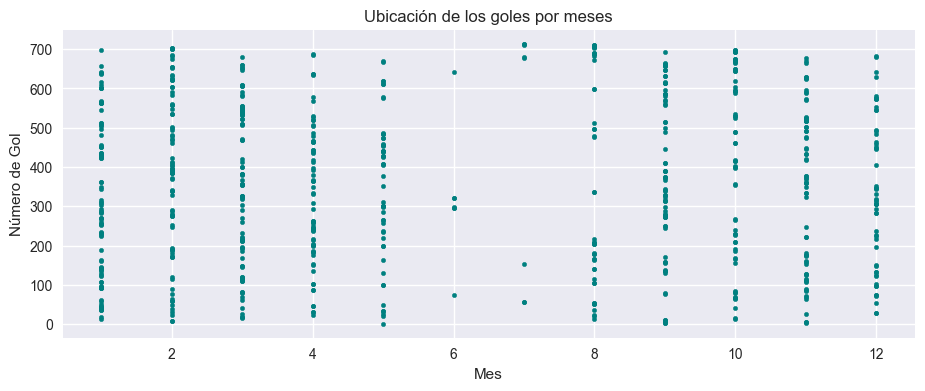

In [9]:
# Distribución de goles por meses.
fig = plt.figure(figsize=(11, 4))
plt.scatter(df['Mes'], df['Gol Numero'], c='teal', marker='o', s=10)
plt.title("Ubicación de los goles por meses")
plt.xlabel("Mes")
plt.ylabel("Número de Gol");

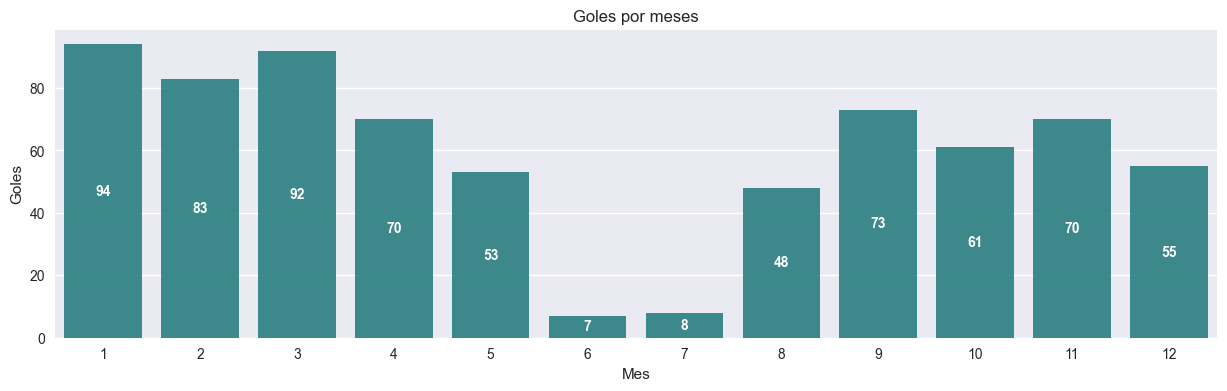

In [10]:
# El mes del año donde Messi hizo más goles es Enero
datos = {'Mes': list(df['Mes'].value_counts().sort_index(ascending=True).index),
         'Goles': list(df['Mes'].value_counts().sort_index(ascending=True).values)}
datos = pd.DataFrame(datos)
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(15, 4))
ax = sns.barplot(data=datos, x='Mes', y='Goles', color='teal', alpha=0.8)
plt.title("Goles por meses")
plt.xlabel("Mes")
plt.ylabel("Goles")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=10, color='white', fontweight='bold');

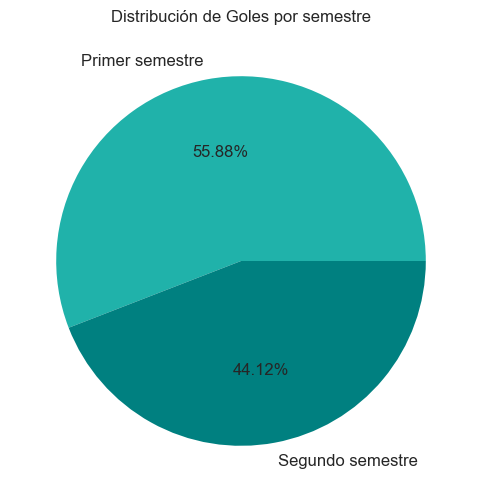

In [11]:
# Por semestre
fig = plt.figure(figsize=(8, 6))
primer_semestre = datos[datos['Mes'].between(1, 6)]['Goles'].sum()
segundo_semestre = datos[datos['Mes'].between(7, 12)]['Goles'].sum()
plt.pie([primer_semestre, segundo_semestre],
         labels=['Primer semestre', 'Segundo semestre'],
           colors=['lightseagreen', 'teal'], textprops={'fontsize': 12}, autopct='%1.2f%%')
plt.title("Distribución de Goles por semestre");

***

**El primer gráfico muestra una distribución bastante equitativa de los goles según los meses, logicamente en los meses de Junio y Julio.**
**casi no se registran goles, coincidiendo con el receso en las actividades**

**En el segundo gráfico se observa que Enero es el mes donde marco la mayor cantidad de goles.**

**En el último se ve el rendimiento antes mencionado por semestre, siendo el primer semestre levemente mayor.**


***

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\1767163360.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_bcn, height=4, aspect=3, palette='Paired', legend=False)


c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


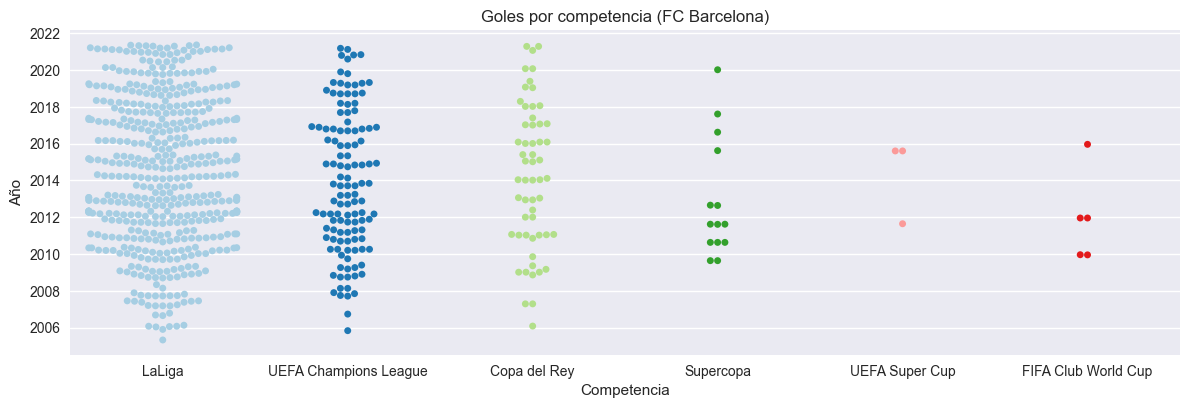

In [12]:
# Goles por competencia en Barcelona.
# Hay competiciones que aparecen escritas de diferentes maneras pero son las mismas
df['Competition'] = df['Competition'].replace({"Troph�e des Champions" : "Trophée des Champions", "Champions League": "UEFA Champions League"})
df_bcn = df[df['Club']=='FC Barcelona']
fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_bcn, height=4, aspect=3, palette='Paired', legend=False)
plt.title('Goles por competencia (FC Barcelona)')
plt.xlabel('Competencia')
plt.ylabel('Año');

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\2357964468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[:6, :], palette="Paired", estimator="sum", errorbar=None)


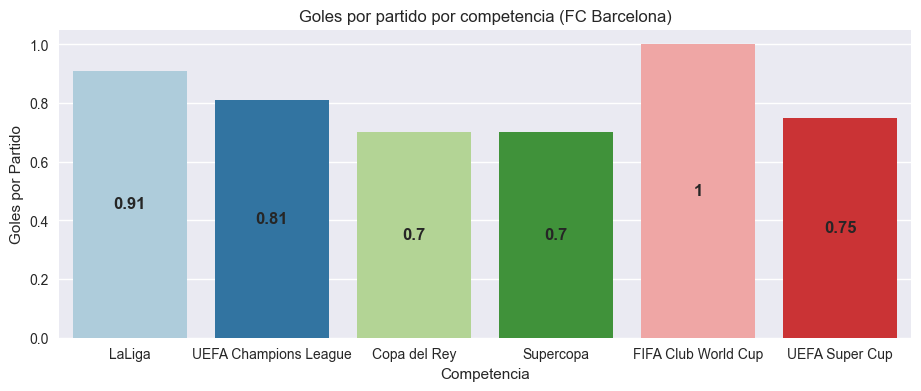

In [13]:
# La distribución de goles no necesariamente masca en que torneo tuvo mejor rendimiento, para eso buscamos el promedio de gol.
promedio_por_torneo = df.groupby('Club')['Competition'].value_counts()
promedio_por_torneo = pd.DataFrame(promedio_por_torneo)
promedio_por_torneo['Partidos'] = [520, 149, 80, 20, 5, 4, 7, 6, 58, 14, 1]  # Datos recogidos de internet.
promedio_por_torneo['Promedio'] = round((promedio_por_torneo['count'] / promedio_por_torneo['Partidos']), 2)
# Gráfico:
fig = plt.figure(figsize=(11, 4))
ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[:6, :], palette="Paired", estimator="sum", errorbar=None)
plt.title("Goles por partido por competencia (FC Barcelona)")
plt.xlabel("Competencia")
plt.ylabel("Goles por Partido")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=12, fontweight='bold' );

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\205741606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_psg, height=3, aspect=2.5, palette='Paired', legend=False)


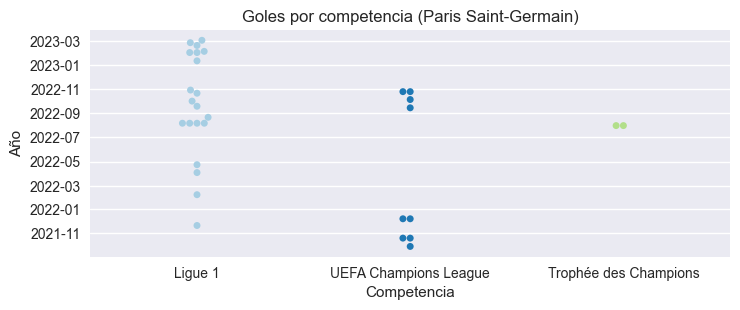

In [14]:
# Goles por competencia en Paris Saint-Germain.
df_psg = df[df['Club']=='Paris Saint-Germain']
fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_psg, height=3, aspect=2.5, palette='Paired', legend=False)
plt.title('Goles por competencia (Paris Saint-Germain)')
plt.xlabel('Competencia')
plt.ylabel('Año');

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\29442651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[8:, :], palette="Paired", estimator="sum", errorbar=None)


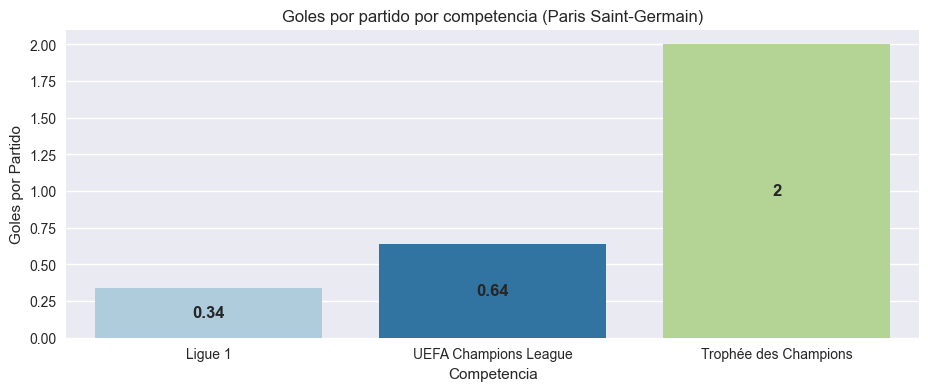

In [15]:
fig = plt.figure(figsize=(11, 4))
ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[8:, :], palette="Paired", estimator="sum", errorbar=None)
plt.title("Goles por partido por competencia (Paris Saint-Germain)")
plt.xlabel("Competencia")
plt.ylabel("Goles por Partido")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=12, fontweight='bold' );

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\3748491995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_inter, height=3, aspect=2.5, palette='Paired', legend=False)


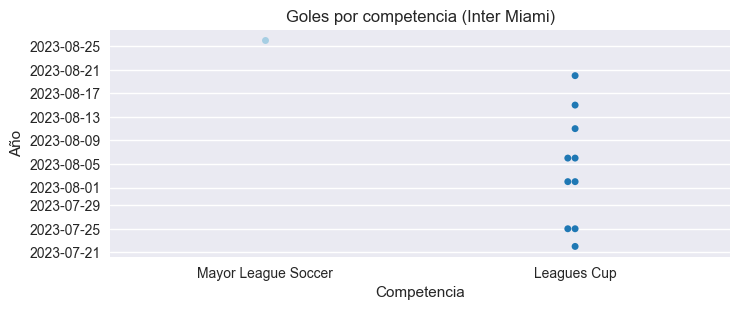

In [16]:
# Goles por competencia en Inter Miami.
df_inter = df[df['Club']=='Inter Miami']
fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_inter, height=3, aspect=2.5, palette='Paired', legend=False)
plt.xlabel('Competencia')
plt.ylabel('Año')
plt.title('Goles por competencia (Inter Miami)');

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\4231368371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[6:8, :], palette="Paired", estimator="sum", errorbar=None)


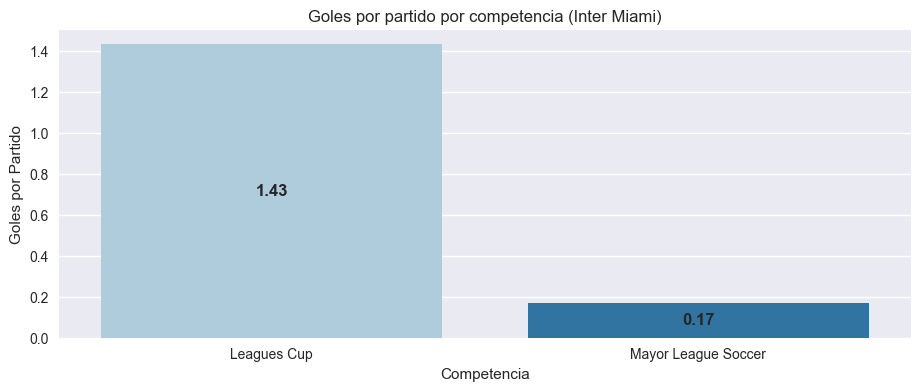

In [17]:
fig = plt.figure(figsize=(11, 4))
ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[6:8, :], palette="Paired", estimator="sum", errorbar=None)
plt.title("Goles por partido por competencia (Inter Miami)")
plt.xlabel("Competencia")
plt.ylabel("Goles por Partido")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=12, fontweight='bold' );

***

**Los gráficos que muestran la distribución de goles permiten ver que torneos marco la mayor cantidad de goles, pero no tiene en cuenta la cantidad de partidos disputado en c/u. Por ello debajo de estos se agrega un gráfico de barras indicando el promedio de gol por partido**

***

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\2224251409.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Date', hue='Venue', shade=True)


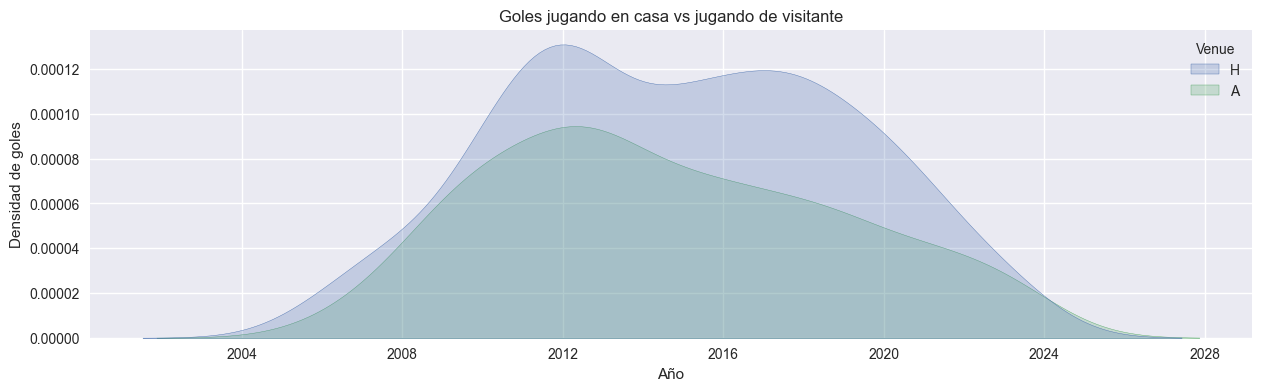

In [18]:
#Densidad de goles marcados en casa vs de visitante.
fig = plt.figure(figsize=(15,4))
sns.kdeplot(data=df, x='Date', hue='Venue', shade=True)
plt.title("Goles jugando en casa vs jugando de visitante")
plt.xlabel("Año")
plt.ylabel("Densidad de goles");

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\2591156052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.catplot(x="Venue",


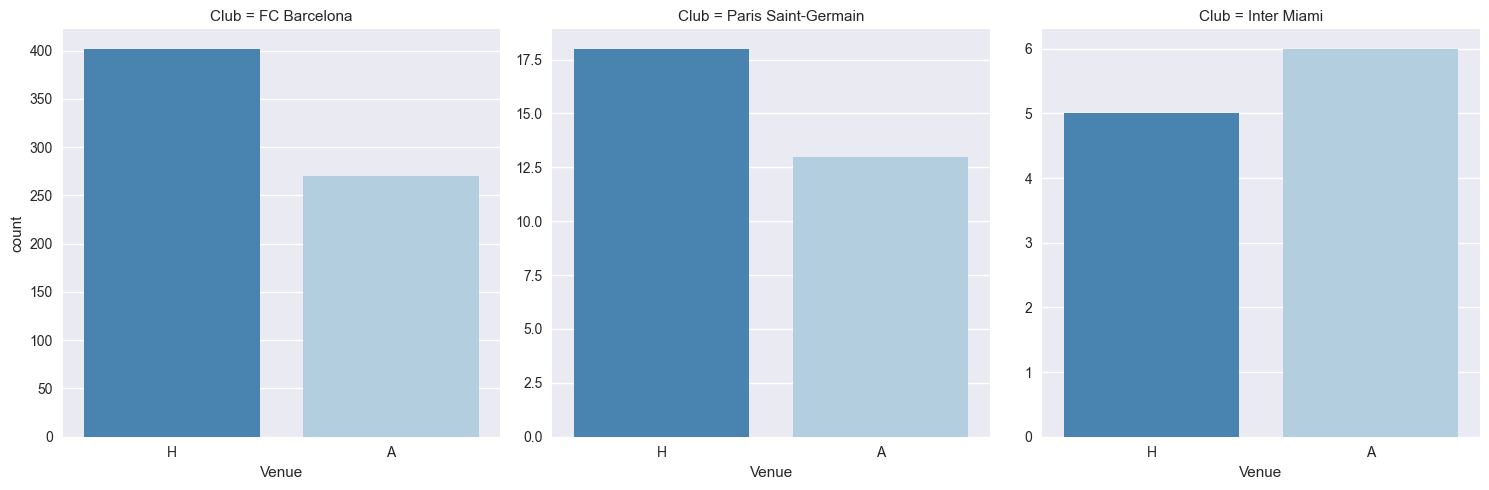

In [19]:
# Aquí lo vemos en cantidades y por club.
fig = sns.catplot(x="Venue",
            col="Club",
            col_wrap=3,
            data=df,
            kind="count",
            sharey=False,
            palette='Blues_r',
            legend=False);

***

**Los equipos suelen marcar más goles (o por lo menos tener mejores resultados) jugando en su estadio que fuera de él. Los gráficos muestran que esto coincide con el desempeño en cantidad de goles de Messi, excepto la etapa actual en Inter Miami, dónde lleva más goles jugando fuera de casa, seguramente este patrón cambie en un tiempo coincidiendo con el comportamiento general.**

***

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\3380252807.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=max_asistidores.index, y=max_asistidores['count'], data=max_asistidores, palette='mako', errorbar=None)


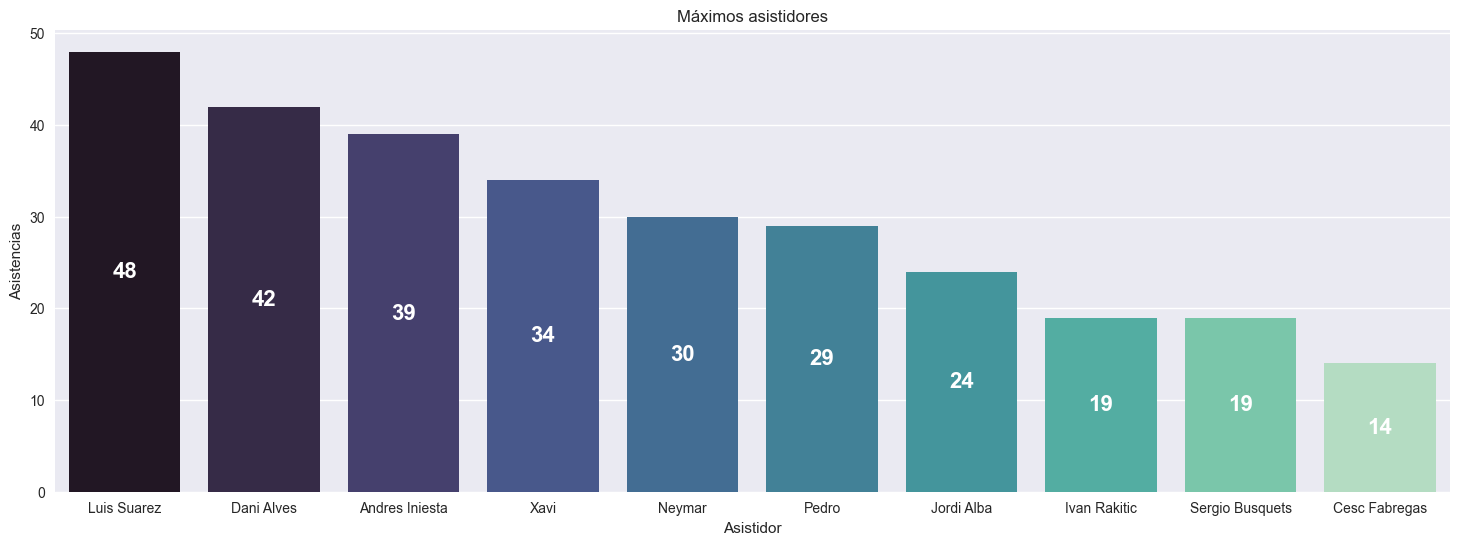

In [20]:
# Máximos asistidores de Messi en su carrera a nivel clubes.
max_asistidores = df['Goal_assist'].value_counts().head(10)
max_asistidores = pd.DataFrame(max_asistidores)
# En un gráfico de barras
fig = plt.figure(figsize=(18,6))
ax = sns.barplot(x=max_asistidores.index, y=max_asistidores['count'], data=max_asistidores, palette='mako', errorbar=None)
plt.title("Máximos asistidores")
plt.xlabel("Asistidor")
plt.ylabel("Asistencias")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=16, color='white', fontweight='bold');

***

**Mediante un gráfico sencillo se ve que Luis Suarez es el mayor asistidos de Messi. Como es de esperar la lista esta compuesta en su mayoría por jugadores del Barcelona**

***

**DESARROLLO DE LAS HIPÓTESIS**

* Hipótesis 1: el desempeño goleador de Messi es más alto enfrentando a equipos de la Comunidad de Madrid que a cualquier otra Comunidad de España.

In [21]:
# Se importan los datasets para luego unirlos

df = pd.read_csv('data/messi_goles.csv')
# Buscando información en la web noto que la cantidad de equipos diferentes a los que le marco goles difieren con los obtenidos en el dataset.
# Montpellier y Montpellier HSC son el mismo club
df['Opponent'].replace("Montpellier", "Montpellier HSC", inplace=True)
# Creé un dataframe con la Comunidad Autónoma 
# Obtenía error al leer el archivo por eso uso encoding 'latin-1'
ccaa = pd.read_csv('data/comunidades.csv', encoding='latin-1', sep=";")
df_con_ccaa = pd.merge(df, ccaa)
df_con_ccaa.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Comunidad
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho,Castilla La Mancha
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,Atenas
2,10/11,UEFA Champions League,Group Stage,9/14/10,H,FC Barcelona,Panathinaikos Athens,5:01,CF,22,1:01,Left-footed shot,Xavi,Atenas
3,10/11,UEFA Champions League,Group Stage,9/14/10,H,FC Barcelona,Panathinaikos Athens,5:01,CF,45,3:01,Left-footed shot,Pedro,Atenas
4,10/11,UEFA Champions League,Group Stage,11/24/10,A,FC Barcelona,Panathinaikos Athens,0:03,CF,63,0:02,Left-footed shot,Adriano,Atenas


In [22]:
# Vemos la sumatoria de goles agrupado por Comunidades Autonomas (o provincias/ciudades de equipos de otros países)
goles_por_comunidad = df_con_ccaa.groupby('Comunidad')['Opponent'].aggregate('count').sort_values(ascending=False)
goles_por_comunidad = pd.DataFrame(goles_por_comunidad)
goles_por_comunidad.head()

,Opponent
Comunidad,
Madrid,108
Andalucía,102
Valencia,81
País Vasco,80
Galicia,34


In [23]:
# Pero falta ver el promedio de gol por partido
golespartidos = pd.read_csv('data/goles_mas_partidos.csv', encoding='latin-1', sep=";")
golespartidos.head()

,Equipos,Goles,Partidos
0,AC Milan,8 (8 CL),8 (8 CL)
1,Club Atletico de Ceuta,1 (1 CdR),1 (1 CdR)
2,AS Roma,2 (2 CL),4 (CL)
3,AC Ajaccio,1 (1 Liga),1 (1 Liga)
4,Ajax Amsterdam,6 (6 CL),3 (3 CL)


In [24]:
# Extraer solo goles y partidos y darle formato numero
lista = list(golespartidos['Goles'].values)
lista
lista_2 = []
for i in lista:
    lista_2.append(int(i[:2]))

lista_3 = list(golespartidos['Partidos'].values)
lista
lista_4 = []
for i in lista_3:
    lista_4.append(int(i[:2]))

# Goles y partidos limpios.
golespartidos['Goles'] = lista_2
golespartidos['Partidos'] = lista_4
golespartidos.head()

,Equipos,Goles,Partidos
0,AC Milan,8,8
1,Club Atletico de Ceuta,1,1
2,AS Roma,2,4
3,AC Ajaccio,1,1
4,Ajax Amsterdam,6,3


In [25]:
# Goles por partido
golespartidos['Goles por partido'] = golespartidos['Goles'] / golespartidos['Partidos']
golespartidos.sort_values('Goles por partido', ascending=False).head()

,Equipos,Goles,Partidos,Goles por partido
20,CD Tenerife,5,2,2.500000
13,Bayer 04 Leverkusen,7,3,2.333333
12,BATE Borisov,2,1,2.000000
63,RB Leipzig,2,1,2.000000
4,Ajax Amsterdam,6,3,2.000000


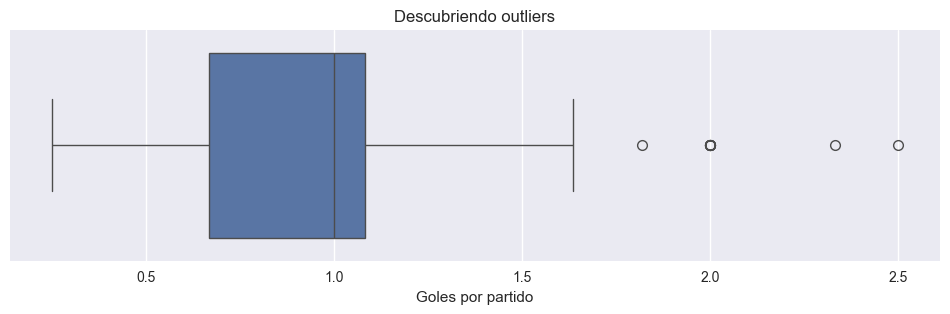

In [26]:
# Hay varios equipos donde el promedio de gol se diferencia mucho del resto
fig = plt.figure(figsize=(12,3))
sns.boxplot(x=golespartidos["Goles por partido"])
plt.title('Descubriendo outliers');

In [27]:
# Para el análisis de Comunidades se tendrán en cuenta vs las que haya disputado al menos 10 partidos.
# Dataset creado manualmente para agregar las Comunidades a las que pertenece cada equipo.
ccaa = pd.read_csv('data/comunidades_limpio.csv', sep=",")
ccaa.head()

,Opponent,Comunidad
0,Albacete Balompie,Castilla La Mancha
1,Panathinaikos Athens,Atenas
2,Racing Santander,Cantabria
3,Athletic Bilbao,País Vasco
4,Deportivo Alaves,País Vasco


In [28]:
# Merge del dataset de goles con el de Comunidades.
golespartidos_conccaa = pd.merge(golespartidos, ccaa, how='inner', left_on='Equipos', right_on='Opponent')
golespartidos_conccaa.head()

,Equipos,Goles,Partidos,Goles por partido,Opponent,Comunidad
0,AC Milan,8,8,1.0,AC Milan,Milan
1,Club Atletico de Ceuta,1,1,1.0,Club Atletico de Ceuta,Ceuta
2,AS Roma,2,4,0.5,AS Roma,Roma
3,AC Ajaccio,1,1,1.0,AC Ajaccio,Ajaccio
4,Ajax Amsterdam,6,3,2.0,Ajax Amsterdam,Amnsterdam


In [29]:
# Partidos vs equipos de cada Comunidad
golespartidos_conccaa.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False).head()

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\3228046264.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  golespartidos_conccaa.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False).head()


Comunidad
Madrid           137
Andalucía        112
C. Valenciana     95
País Vasco        91
Cataluña          40
Name: Partidos, dtype: int64

In [30]:
mas_10_partidos = golespartidos_conccaa[golespartidos_conccaa['Comunidad'].isin(golespartidos_conccaa.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False).head(14).index)]
# La hipotesis inicial es que el mejor rendimiento es vs. equipos de la Comunidad de Madrid, los resultados muestran que es la 6ta Comunidad en cuanto a rendimiento.
mas_10_partidos.groupby('Comunidad')['Goles por partido'].mean().sort_values(ascending=False).head(10)

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\3579352866.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mas_10_partidos = golespartidos_conccaa[golespartidos_conccaa['Comunidad'].isin(golespartidos_conccaa.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False).head(14).index)]


Comunidad
Cataluña          1.238095
Islas Baleares    1.142857
Navarrra          1.136364
Aragón            1.104167
País Vasco        1.068875
Madrid            0.986748
C. Valenciana     0.979336
Galicia           0.949346
Andalucía         0.940657
Londres           0.933333
Name: Goles por partido, dtype: float64

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\2175674414.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df=a.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False)
C:\Users\matia\AppData\Local\Temp\ipykernel_53056\2175674414.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Comunidad", y="Partidos", data=df, palette="Set3", estimator="sum", errorbar=None)


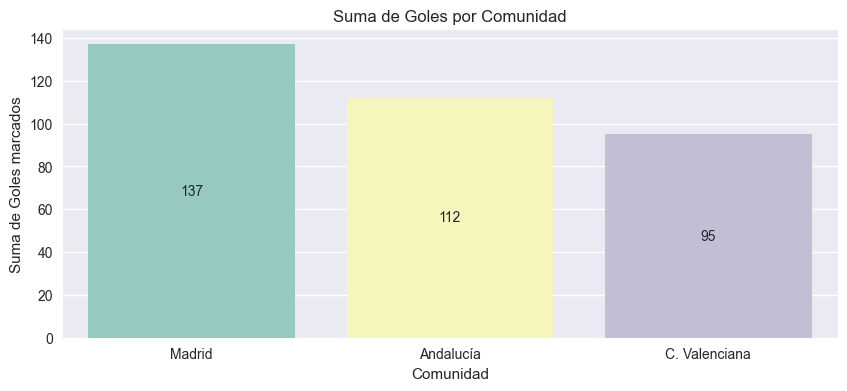

In [31]:
# Gráfico de Comunidades con más goles recibidos
plt.style.use('seaborn-v0_8')
a = golespartidos_conccaa[(golespartidos_conccaa['Comunidad']=='Madrid') | (golespartidos_conccaa['Comunidad']=='Andalucía') | (golespartidos_conccaa['Comunidad']=='C. Valenciana')]
df=a.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False)
df = pd.DataFrame(df)
fig = plt.figure(figsize=(10, 4))
ax = sns.barplot(x="Comunidad", y="Partidos", data=df, palette="Set3", estimator="sum", errorbar=None)
plt.title("Suma de Goles por Comunidad")
plt.xlabel("Comunidad")
plt.ylabel("Suma de Goles marcados")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=10);

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\1007116382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Comunidad", y="Goles por partido", data=df, palette="Set3", estimator="sum", errorbar=None)


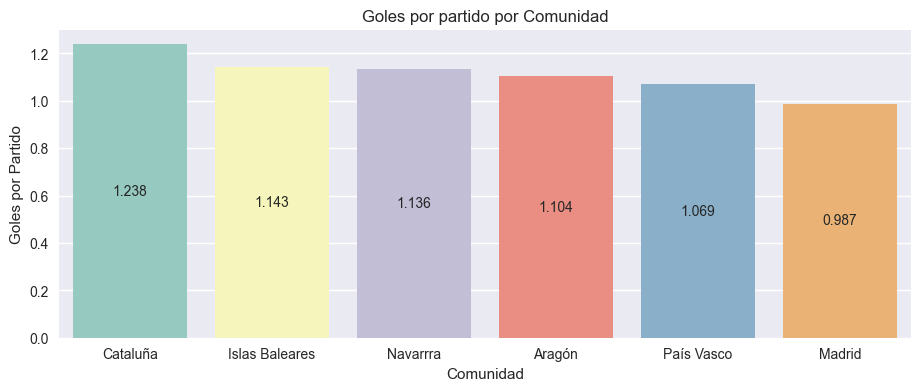

In [32]:
# Gráfico de Comunidades con mejor promedio de gol

df = mas_10_partidos.groupby('Comunidad')['Goles por partido'].aggregate('mean').round(3).sort_values(ascending=False).head(6)
df = pd.DataFrame(df)
fig = plt.figure(figsize=(11, 4))
ax = sns.barplot(x="Comunidad", y="Goles por partido", data=df, palette="Set3", estimator="sum", errorbar=None)
plt.title("Goles por partido por Comunidad")
plt.xlabel("Comunidad")
plt.ylabel("Goles por Partido")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=10);

***

**Si bien la cantidad de goles marcados a equipos de la Comunidad de Madrid es considerablemente mayor al resto, si tenemos en cuenta la cantidad de partidos disputados, vemos que el rendimiento goleador no es tan alto como parece. En este sentido el conjunto de equipos madrileños se ubican en la 6ta posición en cuanto a goles por partido.**

**La hipótesis planteada en un principio es rechazada**

***

* Hipótesis 2 : el desempeño goleador de Messi baja considerablemente en clásicos (vs Real Madrid y vs Espanyol).

In [33]:
# Rendimiento en clásicos (vs Real Madrid y vs Espanyol)
derby = df_con_ccaa[(df_con_ccaa['Opponent'] == 'RCD Espanyol Barcelona') | (df_con_ccaa['Opponent'] == 'Real Madrid')]
mas_10_partidos[mas_10_partidos['Equipos'].isin(derby['Opponent'].values)]
# Promedio de gol en clásicos
mas_10_partidos[mas_10_partidos['Equipos'].isin(derby['Opponent'].values)]['Goles por partido'].mean()

0.6337386018237082

In [34]:
# Promedio general
(golespartidos_conccaa['Goles'].sum()) / (golespartidos_conccaa['Partidos'].sum())

0.8709273182957393

C:\Users\matia\AppData\Local\Temp\ipykernel_53056\2388025452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=["General", "Clásicos"], y=[promedio_general,promedio_derby], palette="Set3", estimator="sum", errorbar=None)


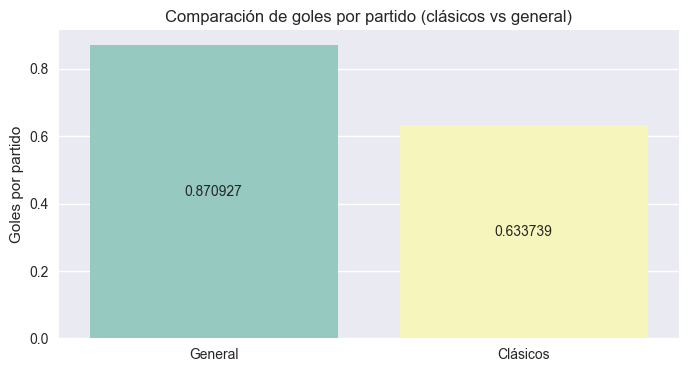

In [35]:
# Gráfico de diferencia entre promedio general y promedio en clásicos.
promedio_derby = mas_10_partidos[mas_10_partidos['Equipos'].isin(derby['Opponent'].values)]['Goles por partido'].mean()
promedio_general = (golespartidos_conccaa['Goles'].sum()) / (golespartidos_conccaa['Partidos'].sum())

fig = plt.figure(figsize=(8, 4))
ax = sns.barplot(x=["General", "Clásicos"], y=[promedio_general,promedio_derby], palette="Set3", estimator="sum", errorbar=None)
plt.title("Comparación de goles por partido (clásicos vs general)")
plt.ylabel("Goles por partido")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=10);

***

**El promedio de goles por partido baja considerablemente cuando se trata de clásicos. La hipótesis se confirma**

***

* Hipótesis 3 : la gran mayoría de goleadores juegan en la delantera, más precisamente como centrodelanteros. Debido a que deben estar en constante disputa con los defensores, una contextura física grande puede ser de gran ayuda. En este sentido, Messi es, dentro del top 50 histórico de goleadores, el de más baja estatura.

In [36]:
#Cargo el dataset de goleadores y veo que no queden datos nulos
goleadores = pd.read_csv('data/goleadores.csv')
# Paso la altura a tipo float
goleadores['Altura'] = goleadores['Altura'].str.replace(',', '.').astype(float)
# Hay un dato mal escrito.
goleadores.at[28, 'Altura'] = 1.78
df = goleadores.sort_values('Altura', ascending=True).head(6)
df

,Jugador,Goles,Partidos,Promedio,Altura
4,Romário,753,963,0.78,1.67
16,Jimmy McGrory,528,522,1.01,1.68
1,Lionel Messi,819,1042,0.79,1.70
15,Uwe Seeler,535,653,0.82,1.70
21,Ferenc Bene,508,493,1.03,1.71
49,József Takacs,418,388,1.08,1.72


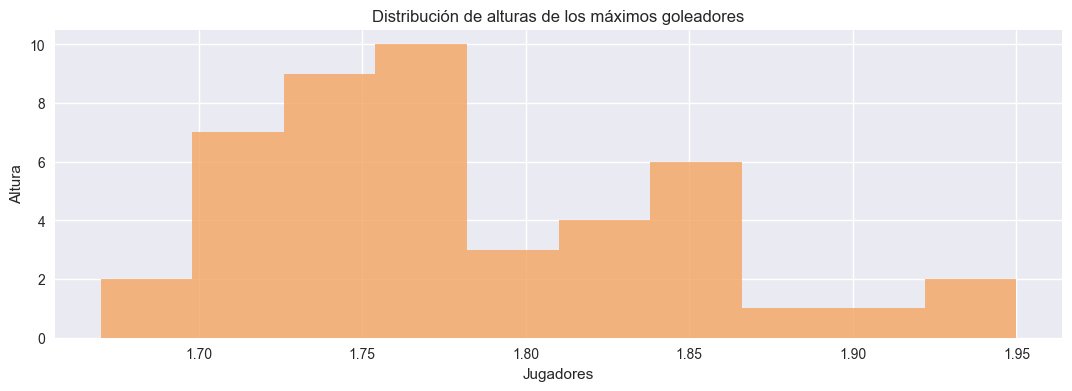

In [37]:
# Gráfico de distribución de alturas.
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(13, 4))
ax = plt.hist(goleadores['Altura'], bins=10, color='sandybrown', alpha=0.8)
plt.title("Distribución de alturas de los máximos goleadores")
plt.xlabel("Jugadores")
plt.ylabel("Altura");

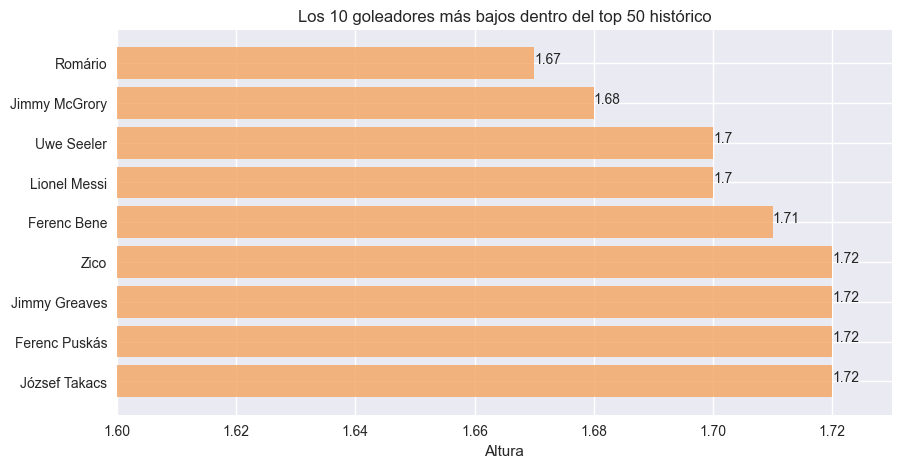

In [38]:
# Gráfico de los jugadores más bajos
goleadores_mas_bajos = (goleadores.sort_values(by="Altura", ascending=True)).iloc[0:9, :]
goleadores_mas_bajos = goleadores_mas_bajos.sort_values(by="Altura", ascending=False)
fig = plt.figure(figsize=(10, 5))
ax = plt.barh(goleadores_mas_bajos["Jugador"], goleadores_mas_bajos["Altura"], color='sandybrown', alpha=0.8)
plt.title("Los 10 goleadores más bajos dentro del top 50 histórico")
plt.xlabel("Altura")
plt.xlim(1.6, 1.73)
for i, valor in enumerate(goleadores_mas_bajos["Altura"]):
    plt.text(valor, i, valor);

***

**No solo los datos muestran que Messi no es el jugador de mas baja estatura dentro del top 50 histórico, sino que al contrario del planteamiento incicial, se observa que la mayoria de los jugadores que componen el ranking tienen una estatura por debajo de 1.78 m.**

**La hipótesis planteada en un principio es rechazada**

***